<a href="https://colab.research.google.com/github/aasifahmed23/Quantum/blob/main/QNN_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Simulation

In [ ]:
# Import NumPy and Qiskit’ s main functionalities
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, Aer
from qiskit import execute
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
%matplotlib inline
#from qiskit import( QuantumCircuit, execute, Aer)

## Step 1: Local Quantum Simulation

In [ ]:
# Use Aer's qasm_simulator (Local)
simulator = Aer.get_backend('qasm_simulator') #qasm_simulator
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)
# Add a H gate on qubit 0
circuit.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1
circuit.cx(0, 1)
# Draw the circuit
circuit.draw()


Total count for 00 and 11 are: {'00': 506, '11': 494}


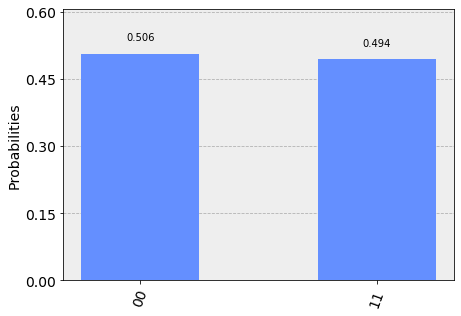

In [ ]:
# Map the quantum measurement to the classical bits
circuit.measure([0,1], [0,1])
# Execute the circuit on the qasm simulator
job = execute(circuit, simulator, shots=1000)
# Grab results from the job
result = job.result()
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
# Plot a histogram
plot_histogram(counts)

## Step 2: Actual Quantum Computer Simulation

In [ ]:
# Actual IBMQ simulation
#IBMQ.save_account('be26e657329bd1c6cd138ffe9ab0638503f5d5e1bb29e3a6ca8a1f33296d7647283f1eb805afe7986b77be773fc62c738982f60db61ffd23b0da6484301bc465')
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')

In [ ]:
job = execute(circuit, backend=qcomp)
job_monitor(job)

Job Status: job has successfully run


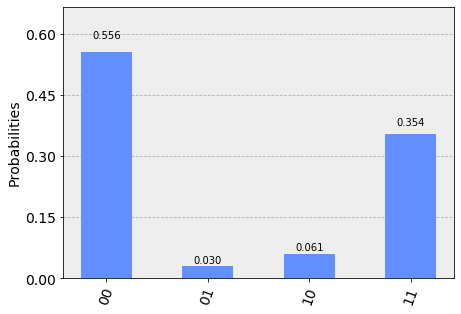

In [ ]:
result = job.result()
plot_histogram(result.get_counts(circuit))

## Step 3: Describe a QNN

 ### Step 0: Get the expected values and unitary parameters:

In [ ]:
distributions= ([0.7, 0.3],[0.3, 0.7])
rewards = [-1,1]
num_shots = 8192
backend_used = Aer.get_backend('qasm_simulator')

In [ ]:
# Get the expected values
expected_values = np.dot(distributions,rewards)
# Get the number of actions involved
num_actions = len(expected_values)
# Get the base number that we will need for the network size
dim = int(np.log2(num_actions))
# Get the parameters for the adaptive gate
maxstring = np.binary_repr(np.argmax(expected_values), width = dim)

In [ ]:
expected_values

array([-0.4,  0.4])

In [ ]:
num_actions

2

In [ ]:
dim

1

In [ ]:
maxstring

'1'

In [ ]:
# Step 1: Setup the Quantum Artificial Neural Network:
        # Get the number of quantum registers
q = QuantumRegister(3*dim)
        # Get the number of classical registers
c = ClassicalRegister(dim)
        # Setup the quantum neural network
        #self.qnnet = QuantumCircuit(q, c)
circuit = QuantumCircuit(q, c)

In [ ]:
circuit.barrier()
circuit.draw()

In [ ]:
# Exploration Stage
for i in range(0,dim):
    circuit.h(q[i])
for j in range(0,dim):
    circuit.u3(float(maxstring[j])*np.pi,0,0,q[dim+j])
for k in range(0,dim):
    circuit.cx(q[k],q[dim+k])
circuit.barrier()
circuit.draw()

In [ ]:
# Exploitation Stage
for l in range(0,dim):
    circuit.cx(q[l],q[2*dim+l])
    circuit.cx(q[dim+l],q[2*dim+l])
circuit.barrier()
circuit.draw()

In [ ]:
# Quantum Measurement
for m in range(0,dim):
    circuit.measure(q[2*dim+m], c[dim-1-m])
circuit.barrier()
circuit.draw()


Total count for 00 and 11 are: {'1': 8192}


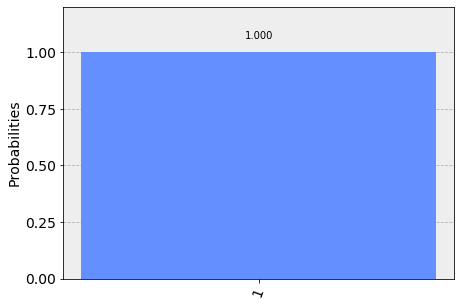

In [ ]:
# Execute the algorithm on the backend
job_exp = execute(circuit, backend = backend_used, shots = num_shots)

# Plot the histogram
#plot_histogram(job_exp.result().get_counts(circuit))

# Grab results from the job
result = job_exp.result()
# Returns counts
counts = result.get_counts(circuit)
print("\nTotal count for 00 and 11 are:",counts)
# Plot a histogram
plot_histogram(counts)


In [ ]:
class Agent:
    def __init__(self, qnnet):
        self.qnnet = qnnet
    # agent’ s Quantum Neural Network
    def get_backend(self,load_accounts = True,backend_code = 'ibmq_qasm_simulator'):
        # Load IBM account if needed
        if load_accounts == True:
            IBMQ.load_accounts()
            backend_used = IBMQ.get_backend(backend_code) # Get the backend to use in the computation
        if backend_code != 'ibmq_qasm_simulator':
            # If one is not using the QASM simulator get the backend status
            print(backend_used.status()) # Return the backend used
        return backend_used
    # probability distributions # reward system # backed to be used # number of shots to run in quantum computer
    def choose_action(self,distributions,rewards,backend_used,num_shots):
        # Step 0: get the expected values and unitary parameters:
        # Get the expected values
        expected_values = np.dot(distributions,rewards)
        # Get the number of actions involved
        num_actions = len(expected_values)
        # Get the base number that we will need for the network size
        dim = int(np.log2(num_actions))
        # Get the parameters for the adaptive gate
        maxstring = np.binary_repr(np.argmax(expected_values), width = dim)

        # Step 1: Setup the Quantum Artificial Neural Network:
        # Get the number of quantum registers
        q = QuantumRegister(3*dim)
        # Get the number of classical registers
        c = ClassicalRegister(dim)
        # Setup the quantum neural network
        self.qnnet = QuantumCircuit(q, c)


        # Step 2: Implement the Reinforcement Learning Algorithm:

        # Exploration Stage
        for i in range(0,dim):
            self.qnnet.h(q[i])
        for j in range(0,dim):
            self.qnnet.u3(float(maxstring[j])*np.pi,0,0,q[dim+j])
        for k in range(0,dim):
            self.qnnet.cx(q[k],q[dim+k])

        # Exploitation Stage
        for l in range(0,dim):
            self.qnnet.cx(q[l],q[2*dim+l])
            self.qnnet.cx(q[dim+l],q[2*dim+l])

        # Quantum Measurement
        for m in range(0,dim):
            self.qnnet.measure(q[2*dim+m], c[dim-1-m])

        # Execute the algorithm on the backend
        job_exp = execute(self.qnnet, backend = backend_used, shots = num_shots)

        # Plot the histogram
        plot_histogram(job_exp.result().get_counts(self.qnnet))


In [ ]:
# Use Aer's qasm_simulator
backend_code = Aer.get_backend('qasm_simulator') #qasm_simulator

In [ ]:
backend_code

<QasmSimulator('qasm_simulator') from AerProvider()>

In [ ]:
agent_obj= Agent

In [ ]:
agent_obj.get_backend(backend_code)

d:\anaconda3\envs\ibmq\lib\site-packages\qiskit\providers\ibmq\utils\deprecation.py:53: DeprecationWarning: IBMQ.load_accounts() is being deprecated. Please use IBM Q Experience v2 credentials and IBMQ.load_account() (note the singular form) instead. You can find the instructions to make the updates here: 
https://github.com/Qiskit/qiskit-ibmq-provider#updating-to-the-new-ibm-q-experience
  DeprecationWarning)
d:\anaconda3\envs\ibmq\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:482: DeprecationWarning: Calling IBMQ.load_accounts() with v2 credentials. This is provided for backwards compatibility and may lead to unexpected behaviour when mixing v1 and v2 account credentials.
  'v1 and v2 account credentials.', DeprecationWarning)
d:\anaconda3\envs\ibmq\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:594: DeprecationWarning: IBMQ.get_backend() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.get_backend("name") to retrieve a b